In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat
import os



In [3]:

os.chdir('C:/Users/JANMEJAY/Desktop/Machine Learning/Andrew NG/Python solutions of Andrew NG/CourseraML-master/ex3/data')

In [24]:
mat = scipy.io.loadmat('ex3data1.mat' )
x, y = mat['X'], mat['y']

In [5]:
x.shape
#y.shape

(5000, 400)

In [6]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [7]:
def derivatives_sigmoid(x):
    return x * (1 - x)

In [8]:
epoch=5000 #Setting training iterations
lr=0.1 #Setting learning rate

In [56]:
inputlayer_neurons = x.shape[1] #number of features in data set
hiddenlayer_neurons = 25
output_neurons=10
ones=np.ones((x.shape[0],1))
#x=np.hstack((ones,x))
x.shape

(5000, 400)

In [57]:
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [58]:
epoch = 5000
s=y.flatten()
s[s==10]=0
y_new=np.zeros((x.shape[0],10))
for i in range(epoch):
    y_new[i,s[i]]=1

y_new.shape     
y_new[2,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
for i in range(5000):
    #Forward Propogation
    hidden_layer_input1=np.dot(x,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y_new-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += x.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
         

[[4.05980864e-060 1.29441560e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21580598e-214]
 [4.05980864e-060 1.29441560e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21580598e-214]
 [4.05980864e-060 1.29441560e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21580598e-214]
 ...
 [4.05984558e-060 1.29441680e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21594437e-214]
 [4.05980864e-060 1.29441560e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21580598e-214]
 [4.05980864e-060 1.29441560e-006 0.00000000e+000 ... 9.99997919e-001
  9.99999821e-001 4.21580598e-214]]


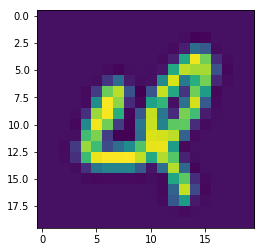

In [72]:
plt.imshow(x[1000,:].reshape(20,20))

In [80]:
a=sigmoid(np.dot(x[0,:],wh) + bh)
b=sigmoid(np.dot(a,wout) + bout)

In [81]:
b

array([[0.00000000e+000, 4.48418300e-125, 9.99999880e-001,
        3.06338632e-012, 0.00000000e+000, 4.11145770e-168,
        2.29236740e-013, 3.80438719e-086, 8.56410331e-009,
        1.78991220e-213]])

In [82]:
np.argmax(b,axis=1)

array([2], dtype=int64)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])